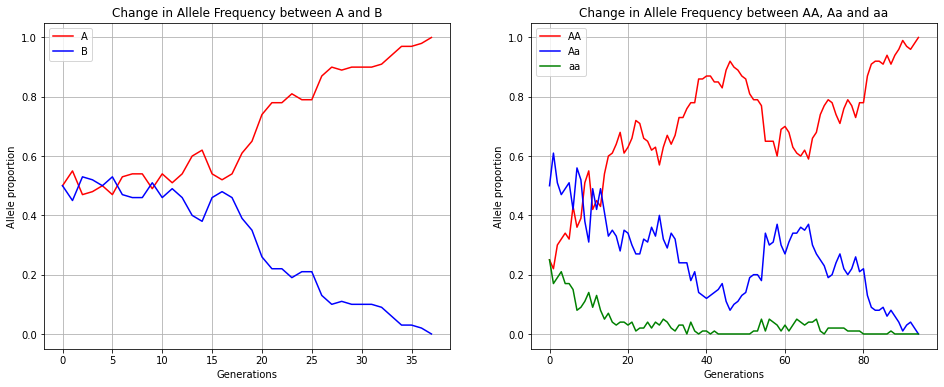

In [1]:
#Import the necessary modules
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#Create the function for task1 with three variables: the population size, the number of generations
#and the proportions of allele A (B will be 1 - that number)
def task1(popsize, gen, prob_A):
    
    # First, we need to create an empty list to store our population
    initial_pop = []
    
    # THen, we create two loops that will add half the popsize of allele A and allele B
    for i in range(0, int(popsize/2)):
        initial_pop.append('A')
    
    for j in range(int(popsize/2), int(popsize)):
        initial_pop.append('B')

    # Next, we create a new variable for the sake of clarity and initiate our loop with x = 0
    old_pop = initial_pop
    x = 0

    # Set the initial proportion of allele A, in this case 0.5
    prob_A = [prob_A]

    # Start the loop that will run for the number of generations and initiate an empty list where we
    # will store our new population after one generation
    while x < gen:
        new_pop = []
    
        # This loop will choose a random number which will be our index for our old_pop to choose an allele
        # it will be done 100 times to keep the population size the same
        for i in range(popsize):
            rand_number = rd.randint(0,popsize-1)
            new_pop.append(old_pop[rand_number])
        # Now our new_pop becomes our old_pop so that we can restart our loop with updated proportions
        old_pop = new_pop
        x+=1
        
        # We use this variable to keep track of the number of A's in our new_pop so that we can calculate
        # the proportion of that allele
        num_A = 0

        for element in new_pop:
            if element == 'A':
                num_A += 1

        prob_A.append(num_A/100)

        # Finally, this loop checks for the presence of both alleles. If one is not present, the loop breaks
        if 'A' not in new_pop or 'B' not in new_pop:
            break

    # We can use the proportion of allele A to calculate the proportion of allele B at any stage
    prob_B = []

    for element in prob_A:
        num_B = 1 - element
        prob_B.append(num_B)
      
    #Finally, our function returns two lists: the proportion of alleles A and B at each generation
    return prob_A, prob_B

# We can assign these two lists to the variable dist (distribution)
dist = task1(100, 1000, 0.5)

###########################################################################################################################

# Here, we can create a new function for the second task that takes the same arguments as
# the first function
def task2(popsize, gen2, init_prob):

    # To initialize this function, we create an empty list and assign the initial probability for each 
    # allele combination (here we distinguish between Aa and aA for computational reasons but we will
    # combine them later), aa will be calcuated later from the other three probabilities
    initial_pop2 = []
    prob_AA = [init_prob]
    prob_Aa = [init_prob]
    prob_aA = [init_prob]

    # We run four loops to create our initial population
    for i in range(0, int(popsize/4)):
        initial_pop2.append('AA')
    for j in range(int(popsize/4), int(popsize/2)):
        initial_pop2.append('Aa')
    for k in range(int(popsize/2), int(popsize/2 + popsize/4)):
        initial_pop2.append('aA')
    for x in range(int(popsize/2 + popsize/4), popsize):
        initial_pop2.append('aa')

    # Like in the first function, we create an old_pop for clarity
    old_pop2 = initial_pop2
    x = 0

    # We make a loop that will run for the number of generations
    while x < gen2:
        new_pop2 = []
        r=0
        
        # In thise loop, we start by randomly choosing a first individual and record its alleles
        # Next, we remove that individual from the possible list of individuals and choose a second
        # individual to make sure an individual does not reproduce with itself
        while r < popsize:
            rand_number = rd.randint(0,popsize-1)
            indiv_1 = old_pop2[rand_number]
            indiv_2_choice = list(range(0,popsize))
            indiv_2_choice.remove(rand_number)
            indiv_2 = old_pop2[rd.choice(indiv_2_choice)]

            # We randomly choose one of two alleles from both individuals and combine them to
            # create a new individual
            allele1 = indiv_1[rd.randint(0,1)]
            allele2 = indiv_2[rd.randint(0,1)]

            indiv_new = allele1 + allele2

            # Next, we need to check if the individual is 'aa' or not
            # If that individual is 'aa', we check for fitness with an 80% chance of being fit
            # If the individual is fit (ie. not a fitness of 1) we add it to the new population
            # and we increment the loop
            # if the individual is NOT fit (ie. a fitness of 1), we don't add it and don't increment
            if indiv_new == 'aa':
                fitness = rd.randint(1,5)
                if fitness == 1:
                    r = r
                else:
                    new_pop2.append(indiv_new)
                    r += 1
            # If the individual is not 'aa', we simply add it to the new population and increment the loop
            else:
                new_pop2.append(indiv_new)
                r += 1

        # We reset the population variables like in the first function
        old_pop2 = new_pop2

        x += 1

        # We use these to keep track of the number of individuals to calculate distribution
        num_AA = 0
        num_Aa = 0
        num_aA = 0

        # and we interate
        for element in new_pop2:
            if element == 'AA':
                num_AA += 1
            elif element == 'Aa':
                num_Aa += 1
            elif element == 'aA':
                num_aA += 1

        prob_AA.append(round(num_AA/100,2))
        prob_Aa.append(round(num_Aa/100,2))
        prob_aA.append(round(num_aA/100,2))

        # This loop checks for the presence of the single allele 'a' in the population
        # As loop as an allele 'a' is present, we continue running
        if 'aa' not in new_pop2 and 'Aa' not in new_pop2 and 'aA' not in new_pop2:
            break
    
    # We return the three distributions
    return prob_AA, prob_Aa, prob_aA

# We assign the three lists to dist2
dist2 = task2(100, 500, 0.25)            

# Here, we first calculate the distribution of allele combination 'aa' using the other three
# distributions
prob_aa = []

for i in range(len(dist2[0])):
    num_aa = 1 - dist2[0][i] - dist2[1][i] - dist2[2][i]
    prob_aa.append(round(num_aa,2)) 

# Then, we combine distributions 'Aa' and 'aA' to represent heterozygosity
for j in range(len(dist2[1])):
    dist2[1][j] = dist2[1][j] + dist2[2][j]

# Finally, we use our two function outputs to create two graphs that represent the change over time of allele
# frequency
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.plot(dist[0], 'r-', label = 'A')
plt.plot(dist[1], 'b-', label = 'B')
plt.xlabel('Generations')
plt.ylabel('Allele proportion')
plt.title('Change in Allele Frequency between A and B')
plt.legend(loc = 'upper left')
plt.grid()

plt.subplot(1,2,2)
plt.plot(dist2[0], 'r-', label = 'AA')
plt.plot(dist2[1], 'b-', label = 'Aa')
plt.plot(prob_aa, 'g-', label = 'aa')
plt.xlabel('Generations')
plt.ylabel('Allele proportion')
plt.title('Change in Allele Frequency between AA, Aa and aa')
plt.legend(loc = 'upper left')
plt.grid()